## Making figure A7
Start by importing modules, data and defining priors.

In [9]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpyro.distributions as dist
import numpy.random as rand
import h5py

from makeCorner import *

In [14]:
data_all = h5py.File("../data/all_varied.hdf", "r")

In [12]:
def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

zs = np.linspace(0,1,500)

### Making the figure

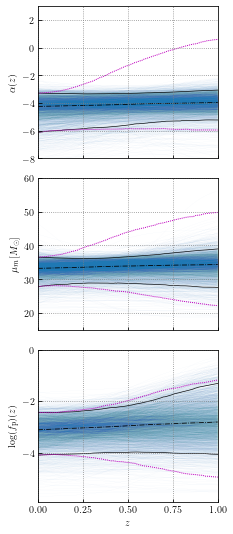

In [15]:
cm = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8.5*cm, 3*6.375*cm))
z_ref = 0

ax1.set_rasterization_zorder(2)
kappa_matrix = np.zeros((len(data_all['posterior/alpha_ref']), len(zs)))
kappa_matrix_post = np.zeros((len(data_all['posterior/alpha_ref']), len(zs)))
for i in range(len(data_all['posterior/alpha_ref'])):
    prior_high_kappa = rand.normal(-2, 3)
    prior_width_kappa = rand.uniform(-1,1)
    prior_width_non_log_kappa = 10.**prior_width_kappa
    prior_middle_kappa = rand.uniform(0, 0.8)
    posterior_value_z_0 = sigmoid_no_delta(data_all['posterior/alpha_ref'][:][i],
                               data_all['posterior/high_alpha'][:][i],
                               data_all['posterior/width_alpha'][:][i],
                               data_all['posterior/middle_z_alpha'][:][i],
                               z_ref,
                              )
    value_at_z_0 = data_all['posterior/alpha_ref'][:][i] + (
        (data_all['posterior/high_alpha'][:][i] - data_all['posterior/alpha_ref'][:][i])/(1 + np.exp(data_all['posterior/middle_z_alpha'][:][i]/data_all['posterior/width_alpha'][:][i]))
    )
    intermediate_step_prior = np.exp(prior_middle_kappa/(10**(prior_width_kappa)))
    low_z_value_kappa = (prior_high_kappa - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)

    kappa_r = sigmoid_no_delta(low_z_value_kappa,
                               prior_high_kappa,
                               10.**prior_width_kappa,
                               prior_middle_kappa,
                               zs,
                              )
    kappa_matrix[i, :] = kappa_r    

    kappa_r = sigmoid_no_delta(data_all['posterior/alpha_ref'][:][i],
                               data_all['posterior/high_alpha'][:][i],
                               data_all['posterior/width_alpha'][:][i],
                               data_all['posterior/middle_z_alpha'][:][i],
                               zs,
                              )
    ax1.plot(zs, kappa_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    kappa_matrix_post[i, :] = kappa_r

median_kappa = np.median(kappa_matrix_post, axis = 0)
ax1.set_ylim(-8, 3)
ax1.set_ylabel(r"$\alpha(z)$", fontsize = 10)
ax1.tick_params(axis='y', labelsize=10)
ax1.plot(zs, median_kappa, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(kappa_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(kappa_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(kappa_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax1.plot(zs,np.quantile(kappa_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))

ax2.set_rasterization_zorder(2)
mu_matrix = np.zeros((len(data_all['posterior/alpha_ref']), len(zs)))
mu_matrix_post = np.zeros((len(data_all['posterior/alpha_ref']), len(zs)))
for i in range(len(data_all['posterior/alpha_ref'])):
    prior_high_mu = rand.uniform(15, 60)
    prior_width_mu = rand.uniform(-1,1)
    prior_width_non_log_mu = 10.**prior_width_mu
    prior_middle_mu = rand.uniform(0, 0.8)
    posterior_value_z_0 = sigmoid_no_delta(data_all['posterior/mu_m1'][:][i],
                               data_all['posterior/high_mu'][:][i],
                               data_all['posterior/width_mu'][:][i],
                               data_all['posterior/middle_z_mu'][:][i],
                               z_ref,
                              )
    value_at_z_0 = data_all['posterior/mu_m1'][:][i] + (
        (data_all['posterior/high_mu'][:][i] - data_all['posterior/mu_m1'][:][i])/(1 + np.exp(data_all['posterior/middle_z_mu'][:][i]/data_all['posterior/width_mu'][:][i]))
    )
    intermediate_step_prior = np.exp(prior_middle_mu/(10**(prior_width_mu)))
    low_z_value_mu = (prior_high_mu - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)

    mu_r = sigmoid_no_delta(low_z_value_mu,
                               prior_high_mu,
                               10.**prior_width_mu,
                               prior_middle_mu,
                               zs,
                              )
    mu_matrix[i, :] = mu_r
    mu_r = sigmoid_no_delta(data_all['posterior/mu_m1'][:][i],
                               data_all['posterior/high_mu'][:][i],
                               data_all['posterior/width_mu'][:][i],
                               data_all['posterior/middle_z_mu'][:][i],
                               zs,
                              )
    ax2.plot(zs, mu_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mu_matrix_post[i, :] = mu_r

median_mu = np.median(mu_matrix_post, axis = 0)
ax2.set_ylim(15, 60)
ax2.set_ylabel(r"$\mu_m [M_\odot]$", fontsize = 10)
ax2.tick_params(axis='y', labelsize=10)
ax2.plot(zs, median_mu, "-.", c="k", zorder = 1, lw = 0.8)
ax2.plot(zs,np.quantile(mu_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax2.plot(zs,np.quantile(mu_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax2.plot(zs,np.quantile(mu_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax2.plot(zs,np.quantile(mu_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))


ax3.set_rasterization_zorder(2)
fpeak_matrix = np.zeros((len(data_all['posterior/log_f_peak']), len(zs)))
fpeak_matrix_post = np.zeros((len(data_all['posterior/log_f_peak']), len(zs)))
for i in range(len(data_all['posterior/log_f_peak'])):
    prior_high_fpeak = rand.uniform(-6, 0)
    prior_width_fpeak = rand.uniform(-1,1)
    prior_width_non_log_fpeak = 10.**prior_width_fpeak
    prior_middle_fpeak = rand.uniform(0, 0.8)
    posterior_value_z_0 = sigmoid_no_delta(data_all['posterior/log_f_peak'][:][i],
                               data_all['posterior/log_high_f_peak'][:][i],
                               data_all['posterior/width_f_peak'][:][i],
                               data_all['posterior/middle_z_f_peak'][:][i],
                               z_ref,
                              )
    value_at_z_0 = data_all['posterior/log_f_peak'][:][i] + (
        (data_all['posterior/log_high_f_peak'][:][i] - data_all['posterior/log_f_peak'][:][i])/(1 + np.exp(data_all['posterior/middle_z_f_peak'][:][i]/data_all['posterior/width_f_peak'][:][i]))
    )
    intermediate_step_prior = np.exp(prior_middle_fpeak/(10**(prior_width_fpeak)))
    low_z_value_fpeak = (prior_high_fpeak - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)

    fpeak_r = sigmoid_no_delta(low_z_value_fpeak,
                               prior_high_fpeak,
                               10.**prior_width_fpeak,
                               prior_middle_fpeak,
                               zs,
                              )
    fpeak_matrix[i, :] = fpeak_r

    f_peak_r = sigmoid_no_delta(data_all['posterior/log_f_peak'][:][i],
                               data_all['posterior/log_high_f_peak'][:][i],
                               data_all['posterior/width_f_peak'][:][i],
                               data_all['posterior/middle_z_f_peak'][:][i],
                               zs,
                              )
    ax3.plot(zs, f_peak_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fpeak_matrix_post[i, :] = f_peak_r

median_fpeak = np.median(fpeak_matrix_post, axis = 0)
ax3.set_xlim(0,1)
ax3.set_ylim(-5.9, 0)
ax3.set_xlabel(r"$z$", fontsize = 10)
ax3.set_ylabel(r"$\log(f_{\rm p})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax3.plot(zs, median_fpeak, "-.", c="k", zorder = 1, lw = 0.8)
ax3.plot(zs,np.quantile(fpeak_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax3.plot(zs,np.quantile(fpeak_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax3.plot(zs,np.quantile(fpeak_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax3.plot(zs,np.quantile(fpeak_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# Adjust layout
plt.tight_layout()
plt.savefig("figure_A7.pdf", dpi=500, bbox_inches="tight")
plt.show()